## Creación de tablas y gráficos

Este *notebook* crea las imágenes y tablas que se van a usar en la presentación de este proyecto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from plottable import Table
from pySankey.sankey import sankey
from pywaffle import Waffle
from wordcloud import WordCloud

In [2]:
# Carga de datasets
corpus_info = pd.read_csv('./data/processed/corpus_info.csv')
corpus_content = pd.read_csv('./data/processed/corpus_content.csv', index_col='Unnamed: 0')
corpus_content_normal = pd.read_csv('./data/processed/corpus_content_normal.csv', index_col='Unnamed: 0')
knn_prediction = pd.read_csv('./data/model_results/knn_prediction.csv')
dt_prediction_1 = pd.read_csv('./data/model_results/dt_prediction_1.csv')
dt_prediction_2 = pd.read_csv('./data/model_results/dt_prediction_2.csv')
svc_prediction = pd.read_csv('./data/model_results/svc_prediction.csv')
clustering_prediction = pd.read_csv('./data/model_results/clustering_prediction.csv')
gradient_boosting_prediction = pd.read_csv('./data/model_results/gradient_boosting_prediction.csv')

In [3]:
# Colores asignados a cada obra del texto
colorDict = {'Fortunata y Jacinta':'#3aa4e0',
             'Gerona':'#3aa4e0',
             'La corte de Carlos IV':'#4f95bd',
             'La de Bringas':'#7db4d4',
             'Marianela':'#23a7db',
             'Misericordia':'#42a1c7',
             'Napoleón en Chamartín':'#86c8f0',
             'Trafalgar':'#38a5f2',
             'La prueba':'#3ca32a',
             'La tribuna':'#67de5f',
             'Los pazos de Ulloa':'#b5f2b1',
             'Un viaje de novios':'#a1d698',
             'Una cristiana':'#99f589',
             'Algo de todo':'#cf4e42',
             'De varios colores':'#de766d',
             'Doña Luz':'#ff8063',
             'Genio y figura':'#eb9791',
             'Juanita la Larga':'#eb5146',
             'Morsamor':'#eb9e98',
             'Pepita Jiménez':'#f75e3b',
             'Pasarse de listo':'#a33f37',
             'Benito Pérez Galdós':'#b5dff7',
             'Emilia Pardo Bazán':'#84f0a8',
             'Juan Valera':'#d49490',
             '0':'#d49490',
             '1':'#b5dff7',
             '2':'#84f0a8'
}

In [4]:
corpus_content = corpus_content.iloc[:,:10].copy()
corpus_content['author'] = corpus_info['author'].values

corpus_content_normal_10 = corpus_content_normal.iloc[:,:10].copy()
corpus_content_normal_10['author'] = corpus_info['author'].values

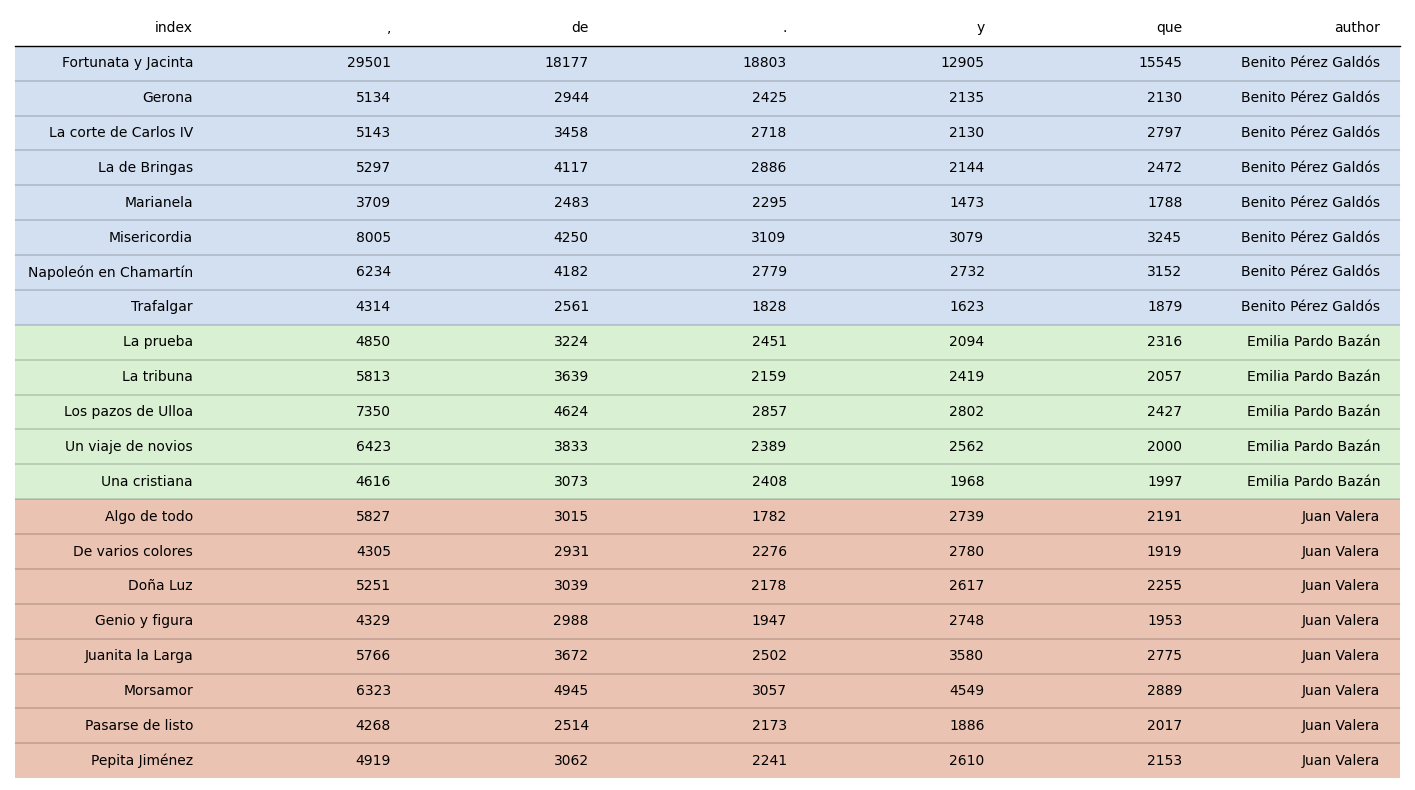

In [5]:
fig, ax = plt.subplots(figsize=(18, 10))
df = corpus_content.iloc[:,[0,1,2,3,4,-1]]
tab = Table(df)
for i in range(8):
    tab.rows[i].set_facecolor("#d3e0f2")
for i in range(8,13):
    tab.rows[i].set_facecolor("#d9f0d3")
for i in range(13,21):
    tab.rows[i].set_facecolor("#ebc3b2")


plt.show()

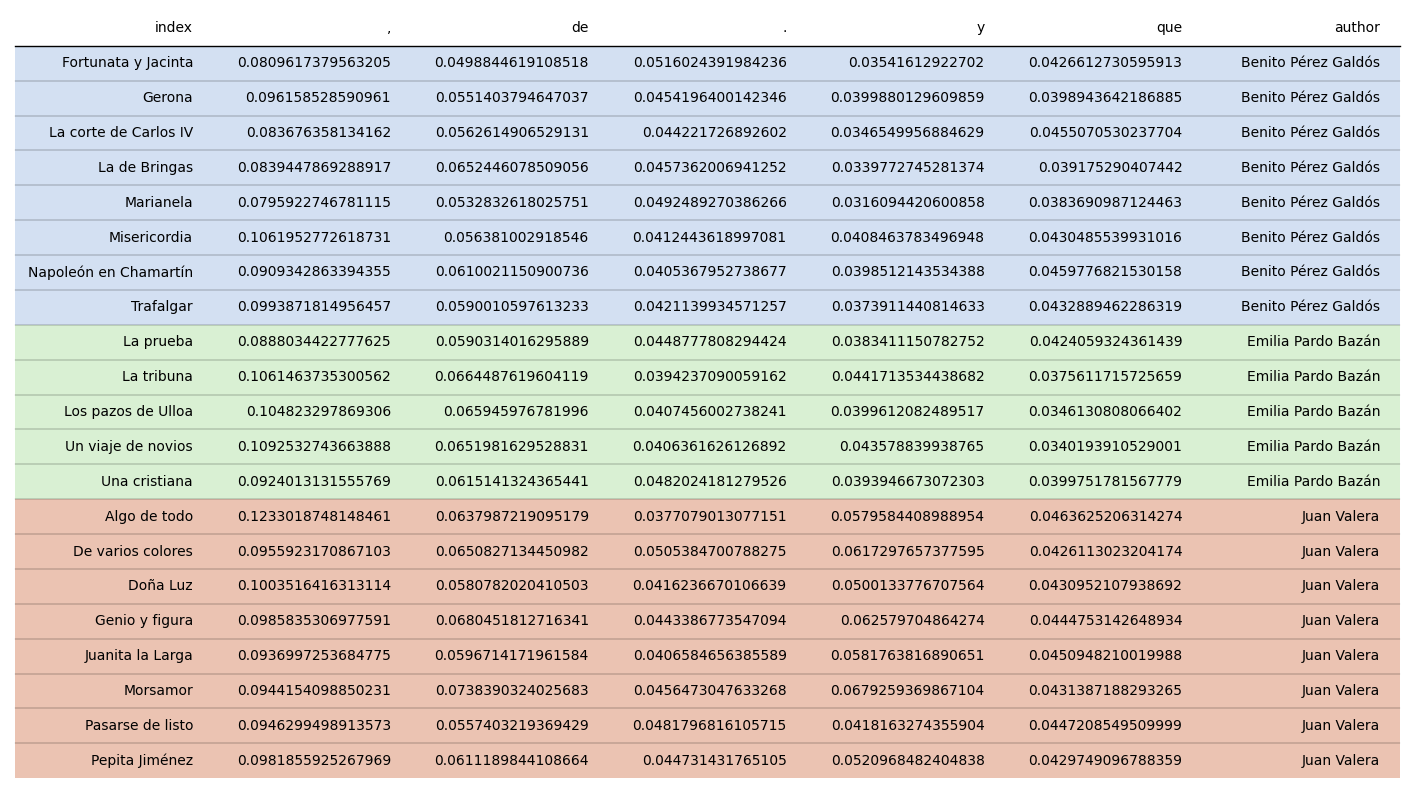

In [6]:
fig, ax = plt.subplots(figsize=(18, 10))
df = corpus_content_normal_10.iloc[:,[0,1,2,3,4,-1]]
tab = Table(df)
for i in range(8):
    tab.rows[i].set_facecolor("#d3e0f2")
for i in range(8,13):
    tab.rows[i].set_facecolor("#d9f0d3")
for i in range(13,21):
    tab.rows[i].set_facecolor("#ebc3b2")


plt.show()

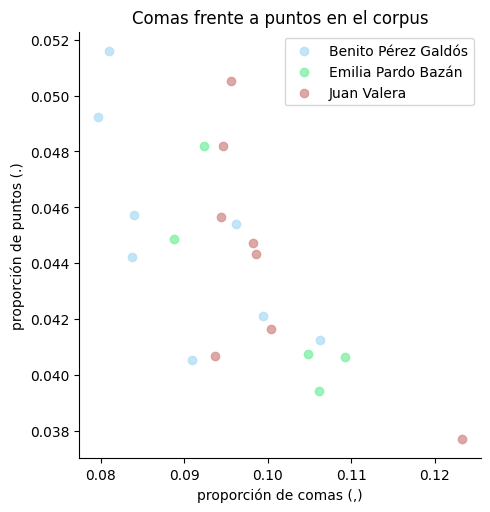

In [7]:
sns.lmplot(x=",", y=".", 
           data=corpus_content_normal_10, 
           fit_reg=False, hue='author', 
           legend=False, 
           palette={'Juan Valera':"#d49490", 'Emilia Pardo Bazán':"#84f0a8", 'Benito Pérez Galdós':"#b5dff7"})
 
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.xlabel('proporción de comas (,)')
plt.ylabel('proporción de puntos (.)')
plt.title('Comas frente a puntos en el corpus')
plt.show()

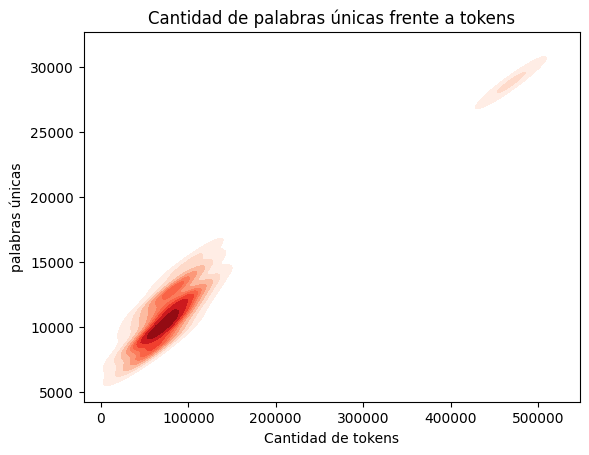

In [8]:

sns.kdeplot(x=corpus_info.tokens, y=corpus_info["unique words"], 
            cmap="Reds", 
            fill=True, 
            bw_adjust=.5)
plt.title('Cantidad de palabras únicas frente a tokens')
plt.xlabel('Cantidad de tokens')
plt.ylabel('palabras únicas')
plt.show()

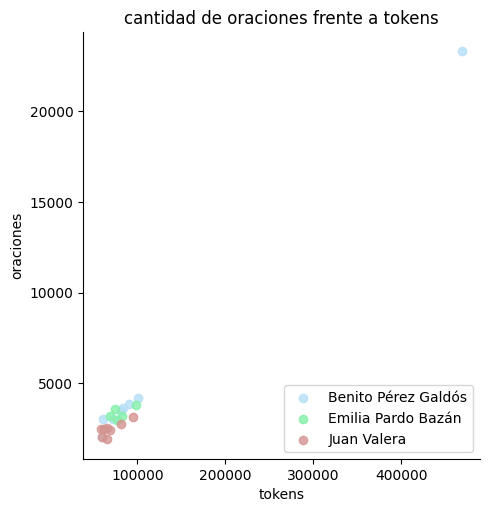

In [9]:
sns.lmplot( x="tokens", y="sentences", 
           data=corpus_info, 
           fit_reg=False, 
           hue='author', 
           legend=False,
           palette={'Juan Valera':"#d49490", 'Emilia Pardo Bazán':"#84f0a8", 'Benito Pérez Galdós':"#b5dff7"})
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('cantidad de oraciones frente a tokens')
plt.xlabel('tokens')
plt.ylabel('oraciones')
plt.show()

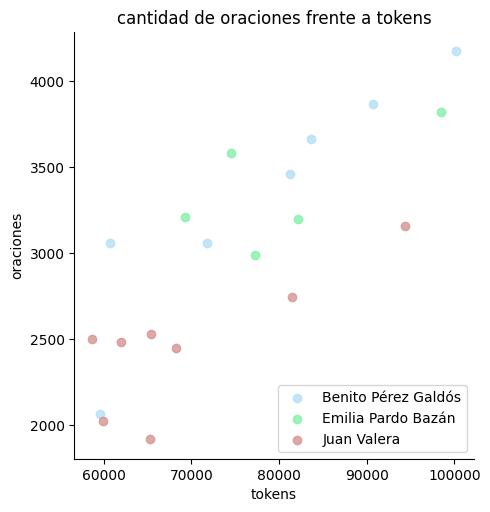

In [10]:
sns.lmplot(x="tokens", y="sentences", 
           data=corpus_info[1:], 
           fit_reg=False, 
           hue='author', 
           legend=False, 
           palette={'Juan Valera':"#d49490", 'Emilia Pardo Bazán':"#84f0a8", 'Benito Pérez Galdós':"#b5dff7"})
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
plt.title('cantidad de oraciones frente a tokens')
plt.xlabel('tokens')
plt.ylabel('oraciones')
plt.show()

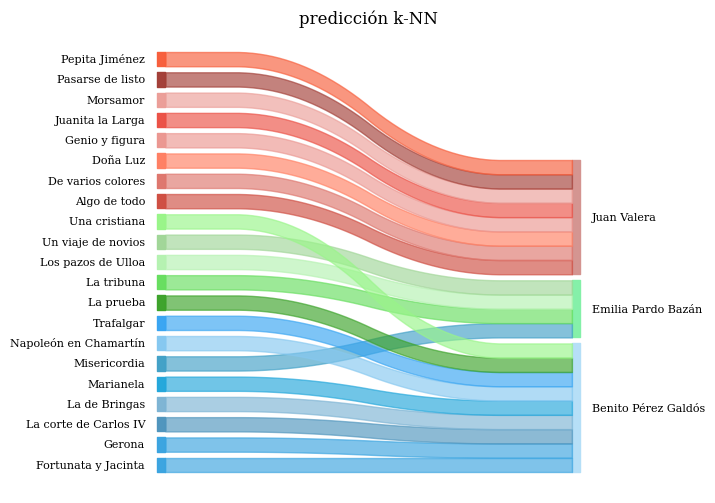

In [11]:
sankey(
    knn_prediction['title'], knn_prediction['prediction'], aspect=20, colorDict=colorDict,
    fontsize=8, figure_name="customer-good"
)
plt.title('predicción k-NN')
plt.show()

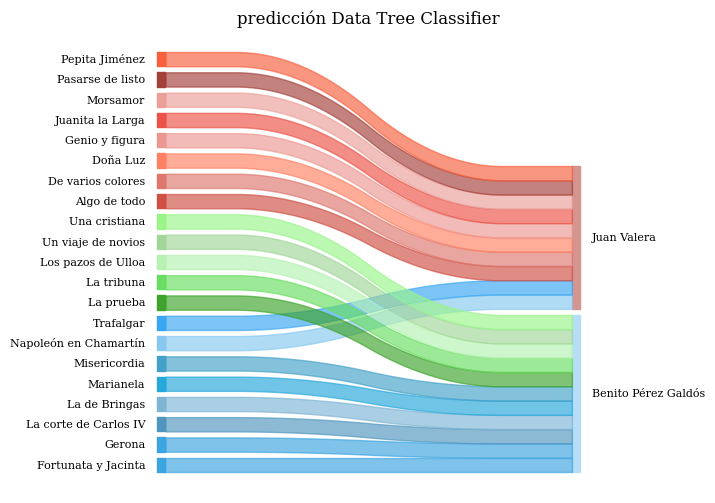

In [58]:
sankey(
    dt_prediction_1['title'], dt_prediction_1['prediction'], aspect=20, colorDict=colorDict,
    fontsize=8, figure_name="customer-good"
)

plt.title('predicción Data Tree Classifier')
plt.show()


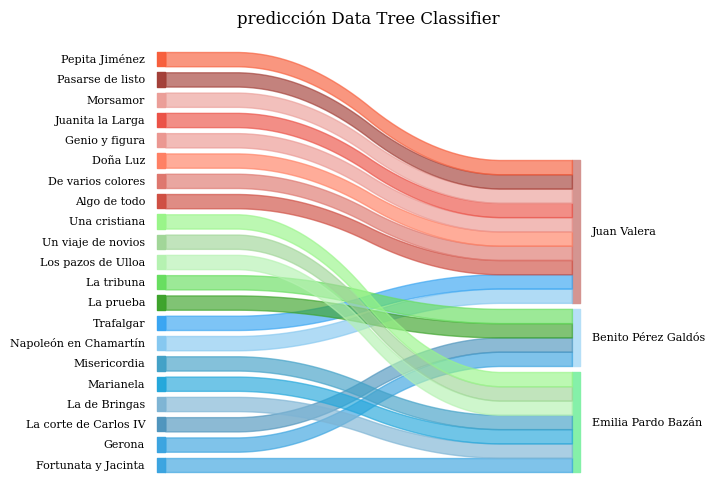

In [13]:
sankey(
    dt_prediction_2['title'], dt_prediction_2['prediction'], aspect=20, colorDict=colorDict,
    fontsize=8, figure_name="customer-good"
)

plt.title('predicción Data Tree Classifier')
plt.show()


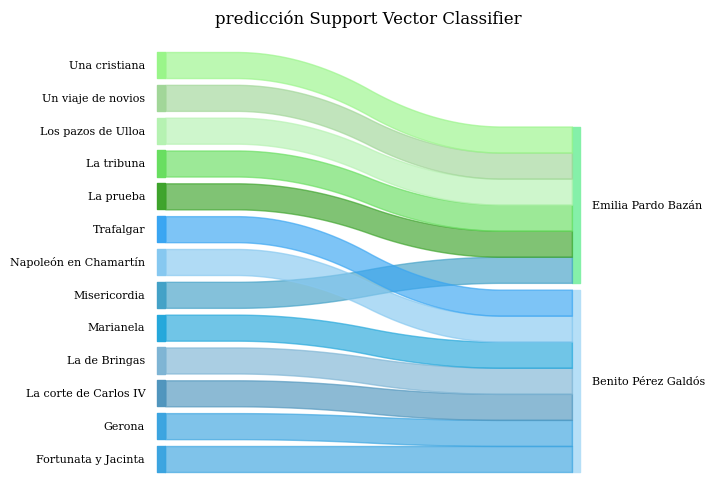

In [14]:
sankey(
    svc_prediction['title'], svc_prediction['prediction'], aspect=20, colorDict=colorDict,
    fontsize=8, figure_name="customer-good"
)

plt.title('predicción Support Vector Classifier')
plt.show()


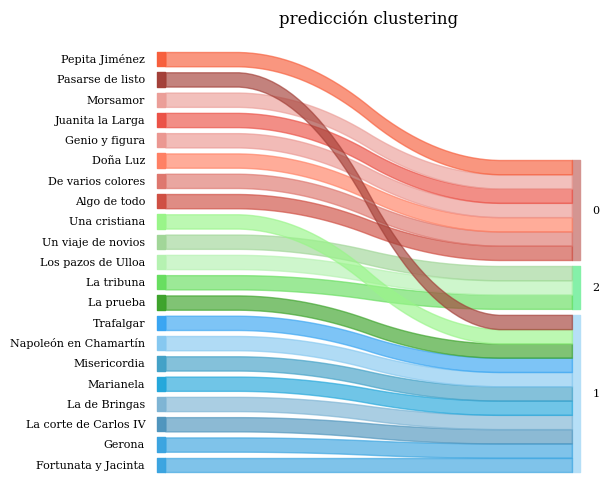

In [15]:
sankey(
    clustering_prediction['title'], clustering_prediction['prediction'].astype(str), aspect=20, colorDict=colorDict,
    fontsize=8, figure_name="customer-good"
)
plt.title('predicción clustering')
plt.show()


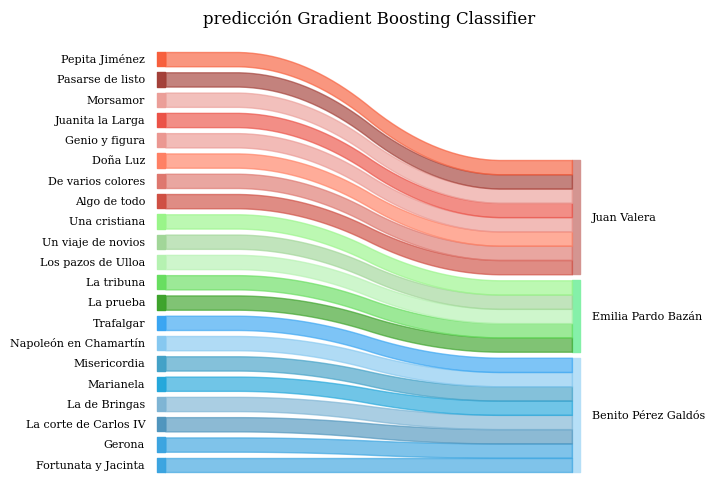

In [16]:
sankey(
    gradient_boosting_prediction['title'], gradient_boosting_prediction['prediction'].astype(str), aspect=20, colorDict=colorDict,
    fontsize=8, figure_name="customer-good")

plt.title('predicción Gradient Boosting Classifier')
plt.show()


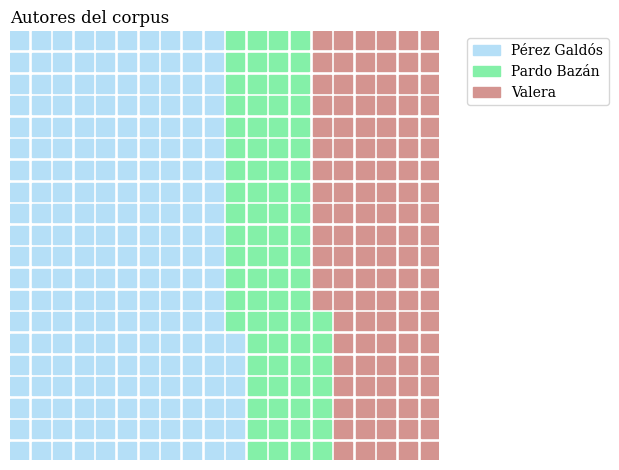

In [17]:
# Basic waffle
dic_authors = {'Pérez Galdós':corpus_info.groupby('author')['tokens'].sum()['Benito Pérez Galdós'],
               'Pardo Bazán':corpus_info.groupby('author')['tokens'].sum()['Emilia Pardo Bazán'], 
               'Valera':corpus_info.groupby('author')['tokens'].sum()['Juan Valera']}
plt.figure(
  FigureClass = Waffle,
  rows = 20,
  columns = 20,
  colors = ["#b5dff7", "#84f0a8", "#d49490"],
  title = {'label': 'Autores del corpus', 'loc': 'left'},
  values = dic_authors,
  legend = {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1)},
  font_size=24
)
plt.show()


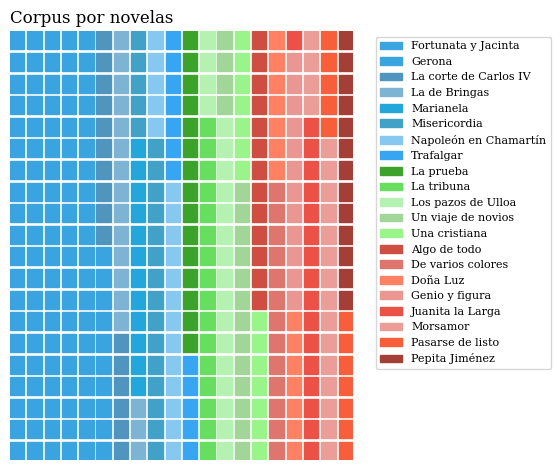

In [18]:
dic_novels = corpus_info['tokens']
dic_novels.index=corpus_info['title']
dic_novels = dic_novels.to_dict()

plt.figure(
  FigureClass = Waffle,
  rows = 20,
  columns = 20,
  colors = list(colorDict.values())[:-6],
  title = {'label': 'Corpus por novelas', 'loc': 'left'},
  values = dic_novels,
  legend = {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'ncol': 1, 'fontsize': 8},
  font_size=6,
  block_aspect_ratio = 0.8,
)
plt.show()

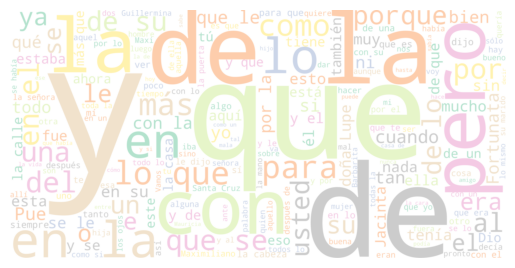

In [57]:

f = open('./data/raw/Galdos_Fortunata_y_Jacinta.txt','r', encoding="utf-8-sig")
fortunata_y_jacinta = f.read()
f.close()

# Create a list of word
lista = corpus_content.columns.to_list()
text = fortunata_y_jacinta

# Create the wordcloud object
wordcloud = WordCloud(width=4000, 
                      height=2000,
                      background_color='white',
                      colormap='Pastel2',
                      margin=0).generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()
